# **Nicholas Salim**
# **CAKAP Data Scientist B**

# Load Dataset
Dataset feature encoded (mapped), outlier handled


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Upload file
uploaded = files.upload()

# After uploading, you can load the file
file_name = list(uploaded.keys())[0]  # Get the file name from the uploaded dictionary
df = pd.read_csv(file_name)

display(df)


Saving garments_model.csv to garments_model.csv


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,3,8,0.80,26.16,1108.0,7080.0,98.0,0.0,0.0,0.0,59.0,0.940725
1,0,0,3,1,0.75,3.94,0.0,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
2,0,1,3,11,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
3,0,1,3,12,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
4,0,1,3,6,0.80,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,2,10,0.75,2.90,0.0,960.0,0.0,0.0,0.0,0.0,8.0,0.628333
1193,1,0,2,8,0.70,3.90,0.0,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1194,1,0,2,7,0.65,3.90,0.0,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1195,1,0,2,9,0.75,2.90,0.0,1800.0,0.0,0.0,0.0,0.0,15.0,0.505889


Target variable distribution

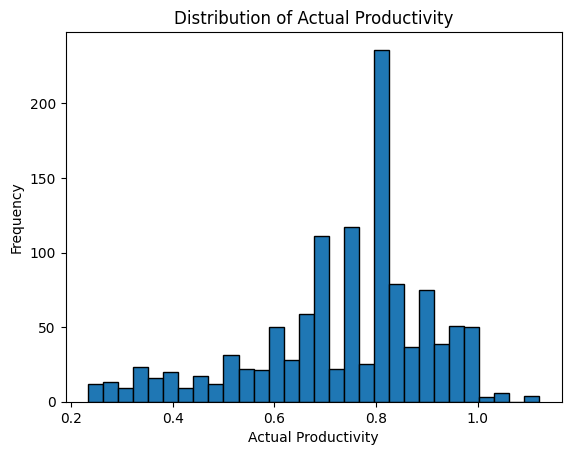

Number of samples with actual_productivity > 0.5: 1064
Number of samples with actual_productivity <= 0.5: 133


In [2]:
import matplotlib.pyplot as plt

# Plot the distribution of 'actual_productivity'
plt.hist(df['actual_productivity'], bins=30, edgecolor='black')
plt.title('Distribution of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()

# Check how many values are above and below 0.5
num_high = df[df['actual_productivity'] > 0.5].shape[0]
num_low = df[df['actual_productivity'] <= 0.5].shape[0]

print(f"Number of samples with actual_productivity > 0.5: {num_high}")
print(f"Number of samples with actual_productivity <= 0.5: {num_low}")


Feature distribution

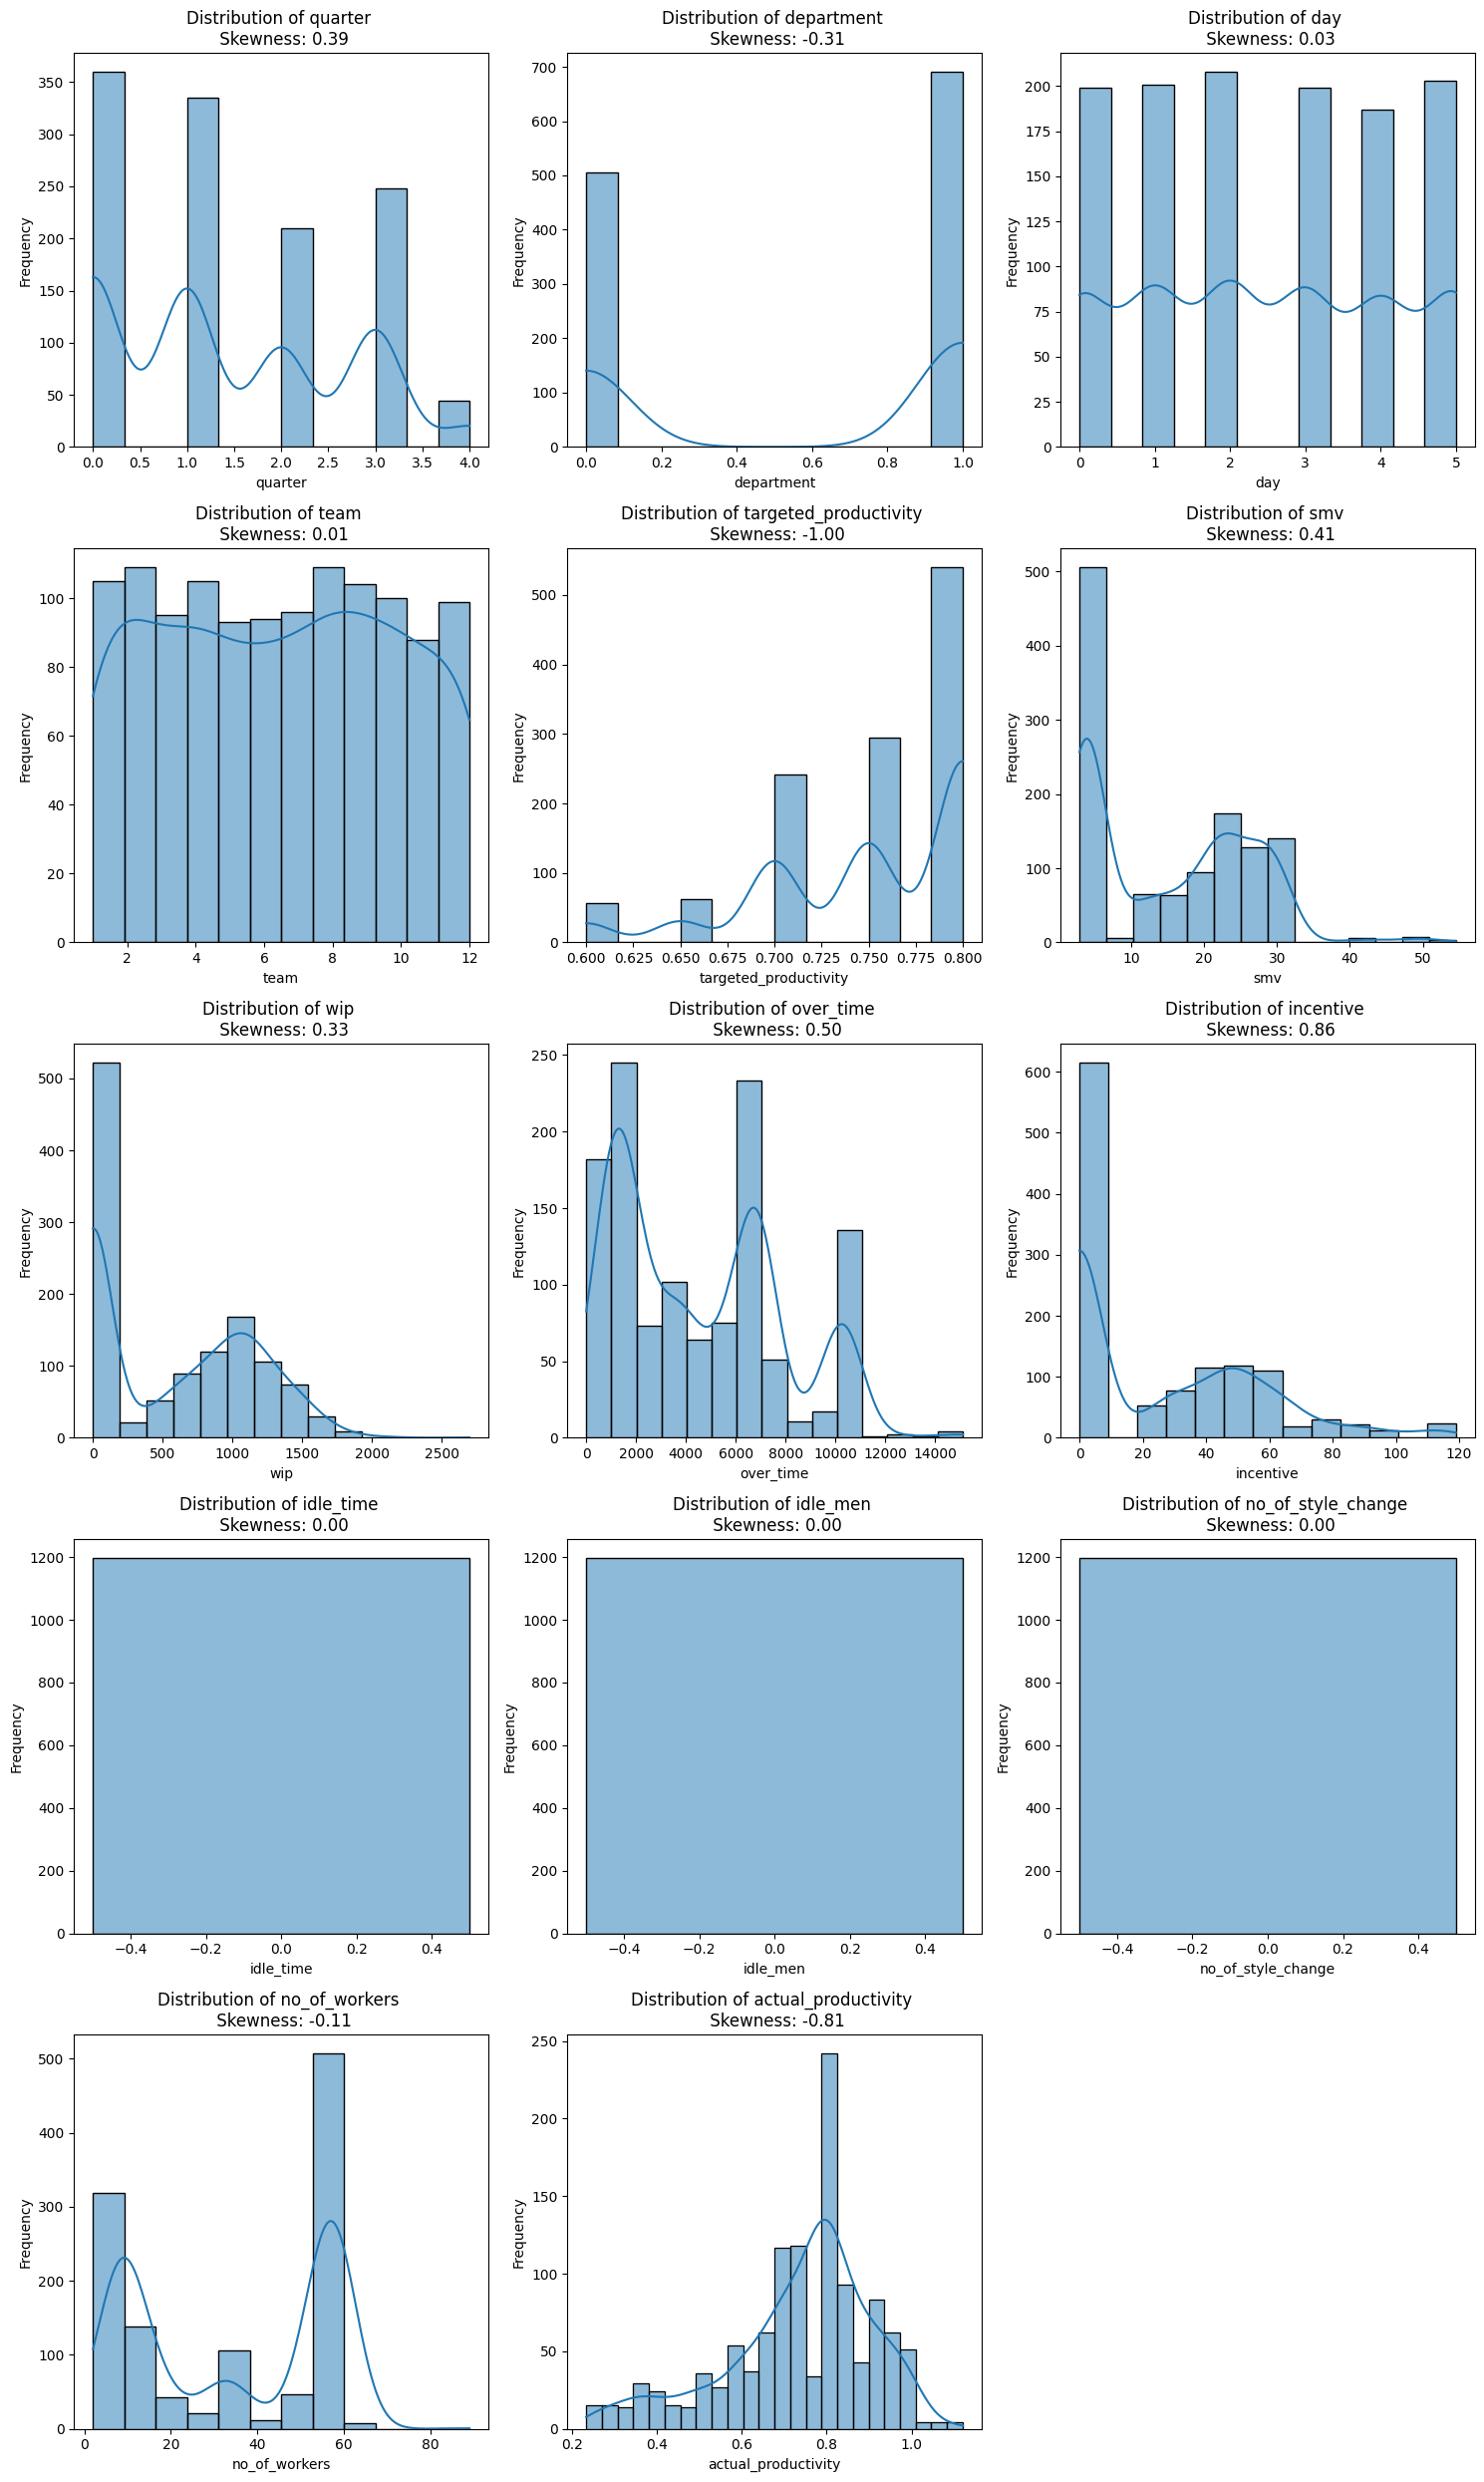

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame
# Create a subplot to visualize the distributions and skewness for all columns
n_cols = len(df.columns)
n_rows = (n_cols // 3) + (n_cols % 3 > 0)  # Adjust rows based on the number of columns

fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through each column and plot the distribution
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} \n Skewness: {df[column].skew():.2f}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Modeling


Feature Scaling (Standard scaler)

Scale mean = 0 dengan standard deviation 1
untuk balancing feature (semua fitur berkontribusi dengan baik)



In [4]:
import pandas as pd

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]

# Step 2: Create a temporary DataFrame
temp_df = X.copy()

# Step 3: Display the temporary DataFrame
print("Temporary DataFrame of Selected Features:")
display(temp_df.head())


Temporary DataFrame of Selected Features:


,targeted_productivity,smv,wip,incentive,over_time
0,0.80,26.16,1108.0,98.0,7080.0
1,0.75,3.94,0.0,0.0,960.0
2,0.80,11.41,968.0,50.0,3660.0
3,0.80,11.41,968.0,50.0,3660.0
4,0.80,25.90,1170.0,50.0,1920.0


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Create a temporary DataFrame for scaled features
scaled_features_df = pd.DataFrame(X_scaled, columns=X.columns)

# Step 4: Display the scaled features
print("Scaled Features (Temporary DataFrame):")
display(scaled_features_df.head())


Scaled Features (Temporary DataFrame):


,targeted_productivity,smv,wip,incentive,over_time
0,0.878899,1.014552,0.937171,2.398763,0.769258
1,-0.000735,-1.016778,-1.015264,-0.846564,-1.090905
2,0.878899,-0.333878,0.690474,0.809215,-0.270245
3,0.878899,-0.333878,0.690474,0.809215,-0.270245
4,0.878899,0.990783,1.046423,0.809215,-0.799115


Feature Selection (MI, Multicolinearity, Corelation matrix)

**Source :** *Capstone Data Preprocessing.ipynb*

Corelation: ***day (low corelation)***

MI: ***team, quarter, no_of_style_change, idle_men, idle_time, day (low predictive value)***

Multicolinearity test: ***department, no_of_worker (high colinearity dengan smv)***

# Random Forest

Random Forest
MAE: 0.07381420007677696
MSE: 0.013818274103925733
RMSE: 0.11755115526410505
MAPE: 12.028157022871918
SMAPE: 11.362247798057771
R2: 0.4795860455512351

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.572029   -0.303815
1       0.800359         0.797487    0.002872
2       0.681061         0.689144   -0.008084
3       0.325000         0.583151   -0.258151
4       0.667604         0.611229    0.056376
5       0.800980         0.675571    0.125409
6       0.768847         0.717801    0.051046
7       0.768847         0.717801    0.051046
8       0.650417         0.605268    0.045149
9       0.750396         0.747861    0.002534
10      0.700398         0.739851   -0.039452
11      0.861679         0.919162   -0.057483
12      0.800319         0.807300   -0.006981
13      0.816406         0.698787    0.117620
14      0.900145         0.867841    0.032303
15      0.935322         0.658001    0.277321
16      1.

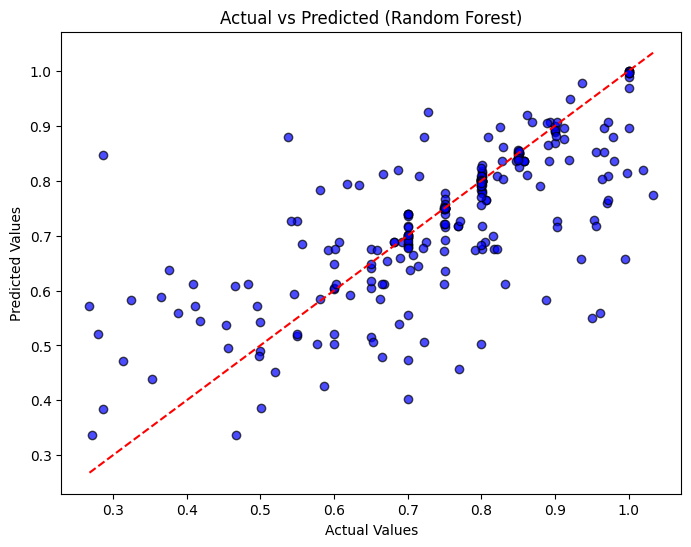

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv','wip', 'incentive', 'over_time']]

y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('Random Forest')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 7: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Step 8: Create a scatter plot for Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()


# Linear Regression

Linear Regression
MAE: 0.09646148100008368
MSE: 0.01772313084771327
RMSE: 0.13312824962311068
MAPE: 15.942226604506521
SMAPE: 14.197413342658194
R2: 0.3325241241921072

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.509479   -0.241265
1       0.800359         0.841851   -0.041493
2       0.681061         0.769964   -0.088903
3       0.325000         0.710615   -0.385615
4       0.667604         0.771165   -0.103561
5       0.800980         0.608056    0.192925
6       0.768847         0.732114    0.036733
7       0.768847         0.732114    0.036733
8       0.650417         0.585344    0.065073
9       0.750396         0.742258    0.008137
10      0.700398         0.795432   -0.095034
11      0.861679         0.751716    0.109963
12      0.800319         0.806206   -0.005887
13      0.816406         0.727213    0.089193
14      0.900145         0.818530    0.081615
15      0.935322         0.735843    0.199479
16     

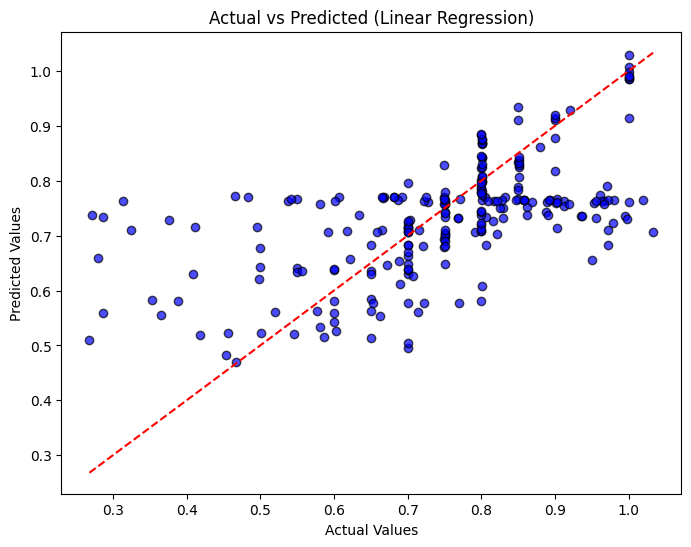

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler (Optional for Linear Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('Linear Regression')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 7: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Optional: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()


# K - Nearest Neighbors

K-Nearest Neighbors
MAE: 0.07960715961333334
MSE: 0.015850686450358076
RMSE: 0.12589950933326974
MAPE: 13.277411302222866
SMAPE: 12.114177816547201
R2: 0.40304278563885143

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.488474   -0.220260
1       0.800359         0.800394   -0.000036
2       0.681061         0.689886   -0.008826
3       0.325000         0.552825   -0.227825
4       0.667604         0.596313    0.071292
5       0.800980         0.665791    0.135190
6       0.768847         0.778878   -0.010031
7       0.768847         0.778878   -0.010031
8       0.650417         0.660204   -0.009787
9       0.750396         0.700366    0.050030
10      0.700398         0.747797   -0.047399
11      0.861679         0.929197   -0.067518
12      0.800319         0.820396   -0.020077
13      0.816406         0.873516   -0.057110
14      0.900145         0.850637    0.049508
15      0.935322         0.681756    0.253566
16 

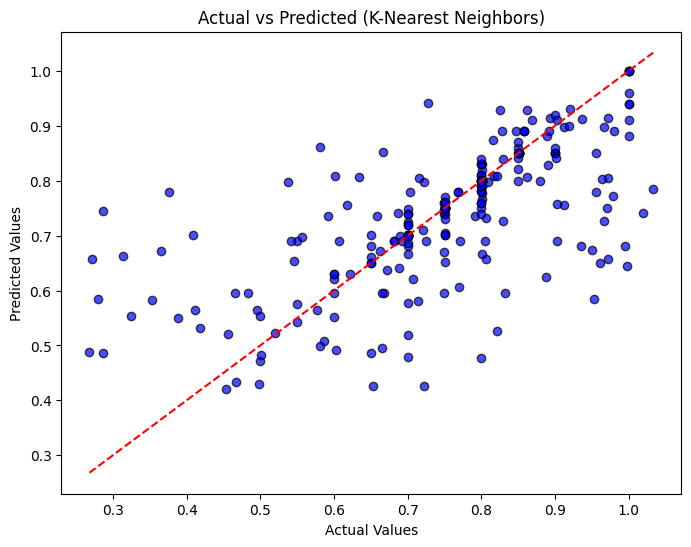

In [8]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler (Optional for KNN, recommended for better performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the KNeighborsRegressor model
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust 'n_neighbors' as needed
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('K-Nearest Neighbors')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 7: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Optional: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (K-Nearest Neighbors)")
plt.show()


# Decision Tree

Decision Tree Regression
MAE: 0.08695600840986202
MSE: 0.020523578363201015
RMSE: 0.14326052618638888
MAPE: 14.196815701660995
SMAPE: 13.617336599440321
R2: 0.22705567315398845

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.700206   -0.431992
1       0.800359         0.800077    0.000282
2       0.681061         0.691645   -0.010584
3       0.325000         0.584187   -0.259187
4       0.667604         0.615038    0.052566
5       0.800980         0.800980    0.000000
6       0.768847         0.942214   -0.173367
7       0.768847         0.942214   -0.173367
8       0.650417         0.650300    0.000117
9       0.750396         0.749987    0.000408
10      0.700398         0.750750   -0.050352
11      0.861679         0.911590   -0.049911
12      0.800319         0.800319    0.000000
13      0.816406         0.507903    0.308503
14      0.900145         0.850502    0.049643
15      0.935322         0.657247    0.27807

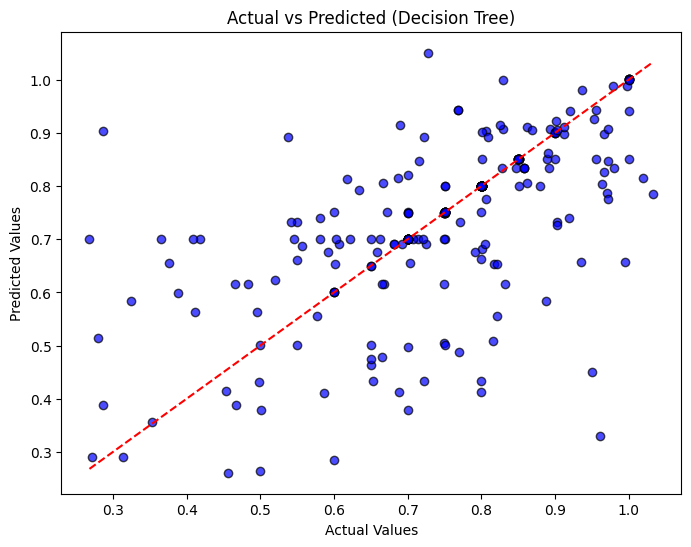

In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler (Optional, not strictly necessary for Decision Tree)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the DecisionTreeRegressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('Decision Tree Regression')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 7: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Optional: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Decision Tree)")
plt.show()


# Support Vector Machine + RBF (Radial basis function)

Support Vector Regression (RBF Kernel)
MAE: 0.09533414338030247
MSE: 0.01766650600775404
RMSE: 0.1329154092186231
MAPE: 15.953584696914353
SMAPE: 14.10921612410191
R2: 0.3346566884082737

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.413397   -0.145183
1       0.800359         0.750157    0.050202
2       0.681061         0.767588   -0.086528
3       0.325000         0.712454   -0.387454
4       0.667604         0.759692   -0.092088
5       0.800980         0.700935    0.100045
6       0.768847         0.805136   -0.036289
7       0.768847         0.805136   -0.036289
8       0.650417         0.628697    0.021719
9       0.750396         0.721407    0.028989
10      0.700398         0.748616   -0.048218
11      0.861679         0.817213    0.044466
12      0.800319         0.908095   -0.107776
13      0.816406         0.814690    0.001716
14      0.900145         0.902545   -0.002400
15      0.935322         0.788350 

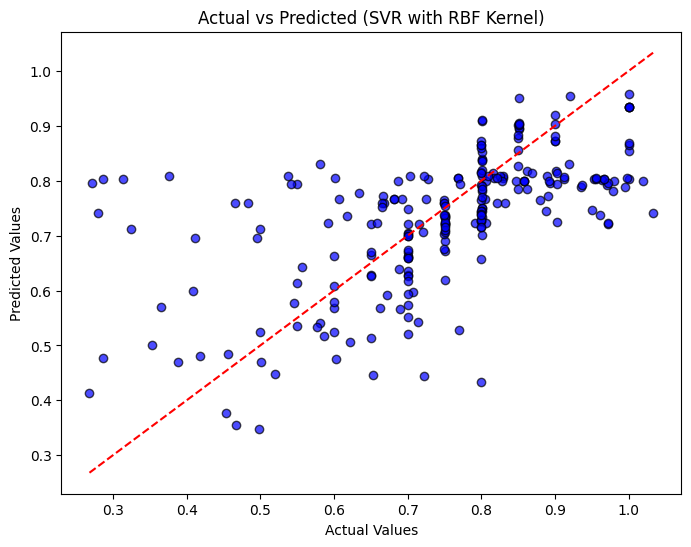

In [10]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler (SVR is sensitive to feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the SVR model with RBF kernel
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('Support Vector Regression (RBF Kernel)')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 7: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Optional: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (SVR with RBF Kernel)")
plt.show()


# XGBoost

XGBoost Regression
MAE: 0.07613217075472385
MSE: 0.01427842149643429
RMSE: 0.11949234911254482
MAPE: 12.149347890985903
SMAPE: 11.624441248380132
R2: 0.4622563036193802

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.458213   -0.189999
1       0.800359         0.807293   -0.006934
2       0.681061         0.693548   -0.012488
3       0.325000         0.585845   -0.260845
4       0.667604         0.613659    0.053945
5       0.800980         0.837146   -0.036166
6       0.768847         0.571348    0.197500
7       0.768847         0.571348    0.197500
8       0.650417         0.614554    0.035863
9       0.750396         0.754693   -0.004298
10      0.700398         0.760903   -0.060505
11      0.861679         0.983652   -0.121973
12      0.800319         0.821375   -0.021057
13      0.816406         0.712151    0.104255
14      0.900145         0.874094    0.026051
15      0.935322         0.653548    0.281774
16    

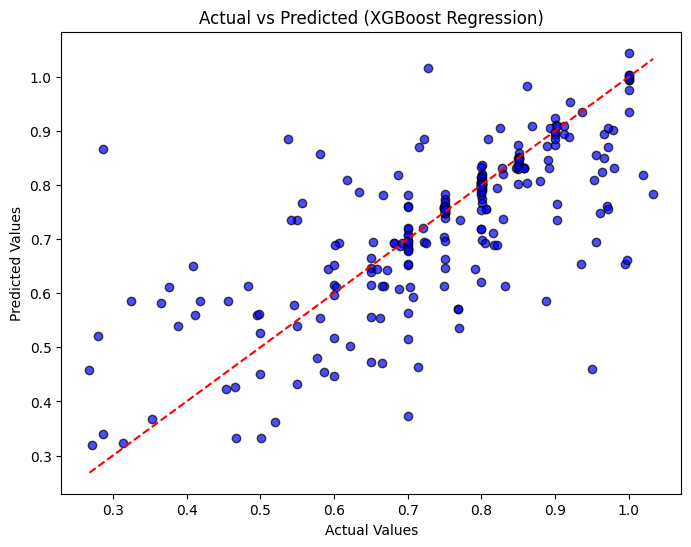

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler (XGBoost is less sensitive to scaling, but it can help with optimization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train the XGBoost model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('XGBoost Regression')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 7: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Optional: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (XGBoost Regression)")
plt.show()


# Polynomial Regression

Polynomial Regression
MAE: 0.0919855295073421
MSE: 0.01736151667698575
RMSE: 0.13176310817898063
MAPE: 15.38960648274062
SMAPE: 13.648526675251976
R2: 0.3461429784106349

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.540230   -0.272016
1       0.800359         0.782158    0.018201
2       0.681061         0.788615   -0.107554
3       0.325000         0.704411   -0.379411
4       0.667604         0.788515   -0.120911
5       0.800980         0.570157    0.230823
6       0.768847         0.737989    0.030858
7       0.768847         0.737989    0.030858
8       0.650417         0.573411    0.077005
9       0.750396         0.729600    0.020795
10      0.700398         0.750660   -0.050262
11      0.861679         0.785044    0.076635
12      0.800319         0.831594   -0.031275
13      0.816406         0.731381    0.085026
14      0.900145         0.861180    0.038965
15      0.935322         0.737484    0.197838
16   

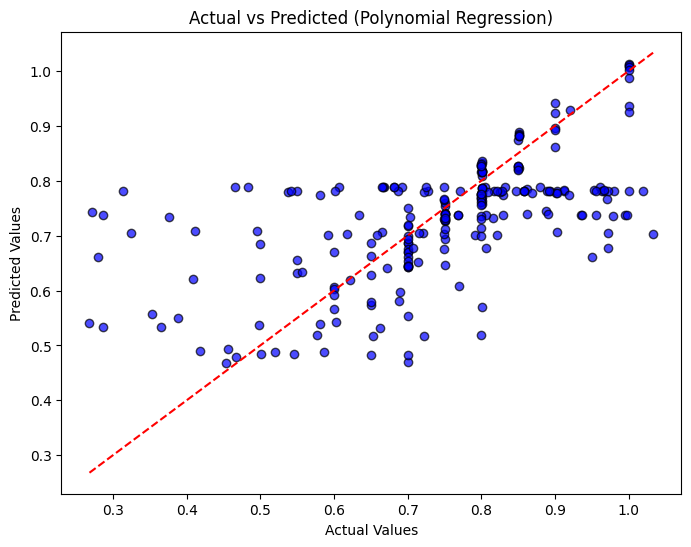

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler (optional, but recommended for better performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Apply Polynomial Features (degree=2 for quadratic features)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Step 5: Train the Polynomial Regression model using Linear Regression
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_poly_test)

# Step 7: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('Polynomial Regression')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 8: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Optional: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Polynomial Regression)")
plt.show()


Hyperparameter Tuning

Implementasi GridSearch untuk hyperparameter tuning, coba setiap paramter dalam grid sampai menemukan kombinasi terbaik.



Cross Validation

Implementasi kFold Cross validation untuk split data ke 5 fold(k) lalu training dan testing berdasarkan fold.

Ex: fold1 test | fold2,fold3,fold4,fold5 train. fold2 test, fold1,3,4,5 train, etc.

Best Model after comparison : Random Forest Regression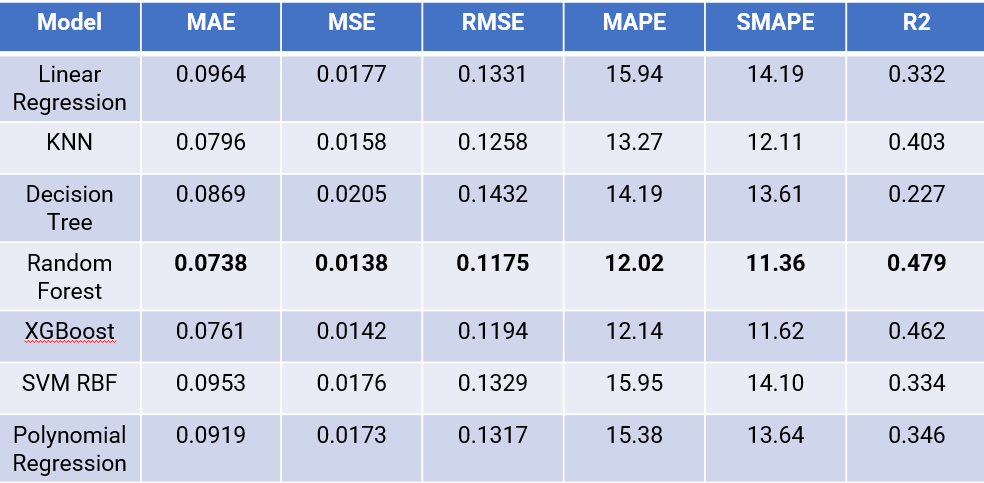

Random Forest + CV + HT

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest with K-Fold CV and Hyperparameter Tuning
MAE: 0.0740964406521895
MSE: 0.0138262646275937
RMSE: 0.11758513778362341
MAPE: 12.18228004879809
SMAPE: 11.448613450420435
R2: 0.4792851121648448

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.578115   -0.309901
1       0.800359         0.799438    0.000921
2       0.681061         0.689144   -0.008084
3       0.325000         0.580856   -0.255856
4       0.667604         0.611649    0.055955
5       0.800980         0.670845    0.130136
6       0.768847         0.719830    0.049018
7       0.768847         0.719830    0.049018
8       0.650417         0.611236    0.039180
9       0.750396         0.747865    0.002530
10      0.700398         0.738939   -0.038540
11     

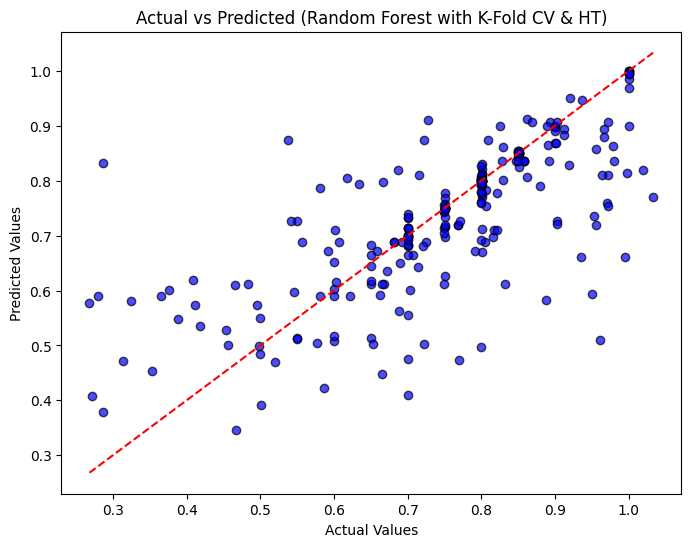

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Define the RandomForestRegressor model
base_model = RandomForestRegressor(random_state=42)

# Step 4: Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Step 6: Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=kf,
    scoring='neg_mean_absolute_error',  # Using MAE for scoring
    verbose=1,
    n_jobs=-1
)

# Step 7: Fit the model with GridSearchCV
grid_search.fit(X_scaled, y)

# Get the best estimator and hyperparameters
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Step 8: Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the best model on the training data
best_model.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = best_model.predict(X_test)

# Step 10: Evaluate using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('Random Forest with K-Fold CV and Hyperparameter Tuning')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 11: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))  # Show first 20 rows for example

# Step 12: Create a scatter plot for Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Random Forest with K-Fold CV & HT)")
plt.show()


XGBoost + CV + HT

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Regression with HT + kFoldCV
MAE: 0.07368831284753335
MSE: 0.013325850344396865
RMSE: 0.11543764699783544
MAPE: 12.06836666810107
SMAPE: 11.363824684775285
R2: 0.49813135692902444

Comparison of Actual vs Predicted Values:
    Actual Value  Predicted Value  Difference
0       0.268214         0.515331   -0.247116
1       0.800359         0.798383    0.001976
2       0.681061         0.698147   -0.017086
3       0.325000         0.591728   -0.266728
4       0.667604         0.611148    0.056457
5       0.800980         0.774064    0.026917
6       0.768847         0.681462    0.087385
7       0.768847         0.681462    0.087385
8       0.650417         0.632309    0.018108
9       0.750396         0.751118   -0.000722
10      0.700398         0.750624   -0.050226
11      0.861679         0.9

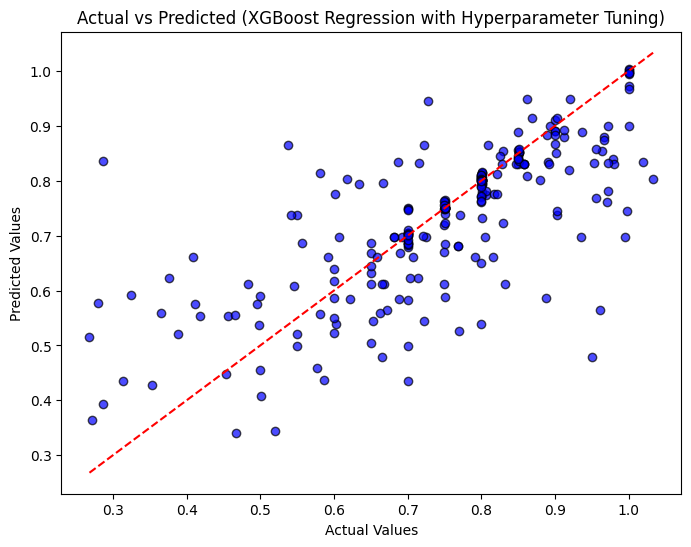

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Step 1: Data preparation (Assuming 'df' is your DataFrame)
X = df[['targeted_productivity', 'smv', 'wip', 'incentive', 'over_time']]
y = df['actual_productivity']

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Define XGBoost model
model = XGBRegressor(random_state=42)

# Step 4: Set up K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Step 6: Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=kf,
    scoring='neg_mean_absolute_error',  # Use MAE as the scoring metric
    verbose=1,
    n_jobs=-1
)

# Fit the model with GridSearchCV
grid_search.fit(X_scaled, y)

# Get the best estimator and hyperparameters
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Step 7: Train-test split for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the best model on the training data
best_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = best_model.predict(X_test)

# Step 9: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))

# Print evaluation metrics
print('XGBoost Regression with HT + kFoldCV')
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"SMAPE: {smape}")
print(f"R2: {r2}")

# Step 10: Create a comparison DataFrame for Actual vs Predicted values
comparison_df = pd.DataFrame({
    'Actual Value': y_test.values,
    'Predicted Value': y_pred,
    'Difference': y_test.values - y_pred
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs Predicted Values:")
print(comparison_df.head(20))

# Step 11: Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (XGBoost Regression with Hyperparameter Tuning)")
plt.show()
